<a href="https://colab.research.google.com/github/josmyrose/Unsupervised-Learning/blob/main/kmeans_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataf=pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
%whos
#To know datatype stored on memory

Variable   Type         Data/Info
---------------------------------
dataf      DataFrame         CustomerID   Genre  <...>n\n[200 rows x 5 columns]
np         module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>


In [9]:
dataf.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
#There is no null values in the dataset
dataf.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
X=dataf.iloc[:,[3,4]]#we need only annual income and spending score values from the dataset
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


269981.28
181363.59595959593
106348.37306211122
73679.78903948836
44448.4554479337
37233.814510710006
30259.65720728547
25011.839349156588
21850.165282585636
19672.072849014323


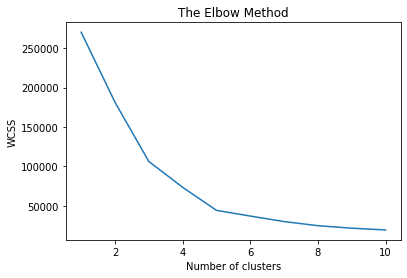

In [25]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): #kmeans++ for selecting the centroids
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42) #instance is created
  #randomstate=42 to ensure that same dataset is used.
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_) 
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
  




From the graph,we can say that no.of clusters is 5(OPtimum value)

In [39]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42) #instance is created
  #randomstate=42 to ensure that same dataset is used.
ykmeans=kmeans.fit_predict(X)
X=np.array(X)# Need to convert into array
type(X)

numpy.ndarray

In [31]:
#print the values of ykmeans
ykmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

Graphs representation of clusters

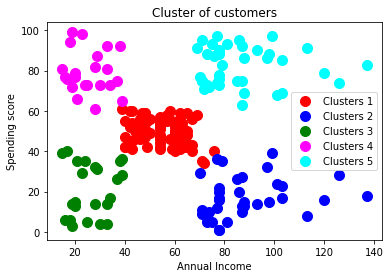

In [41]:
plt.scatter(X[ykmeans == 0,0],X[ykmeans == 0,1],s=100,c='red',label='Clusters 1')
plt.scatter(X[ykmeans == 1,0],X[ykmeans == 1,1],s=100,c='blue',label='Clusters 2')
plt.scatter(X[ykmeans == 2,0],X[ykmeans == 2,1],s=100,c='green',label='Clusters 3')
plt.scatter(X[ykmeans == 3,0],X[ykmeans == 3,1],s=100,c='magenta',label='Clusters 4')
plt.scatter(X[ykmeans == 4,0],X[ykmeans == 4,1],s=100,c='cyan',label='Clusters 5')
plt.title("Cluster of customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.legend()
plt.show()
  




*  The customers under cluster4  spending money is high.The income of customers under this group is very less.


*   The customers under cluster2  spend money very wisely.The income of customers under this group is high .


*   Customers in cluster 3 make purchases based on their income.
We can infer that client behaviour in clusters 1 and 2 is similar.
According to their income, they spend their money.